In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline



In [2]:
# load data to train the model 
train_data = pd.read_csv('image_train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# split dataset into images and labels
labels = train_data.iloc[0:10000, :1]
images = train_data.iloc[0:10000, 1:]


In [4]:
# split data for testing and training
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state = 0)


C:\Users\ernes\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# Use support vector classifier 
# train the classifier using SVC
image_classifier = svm.SVC(kernel='linear')
image_classifier = image_classifier.fit(train_images, train_labels.values.ravel())

C:\Users\ernes\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


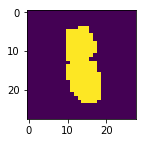

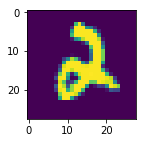

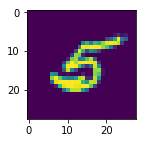

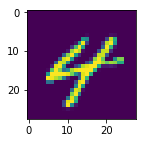

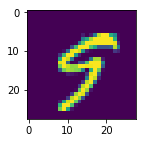

In [11]:
# show some images from the dataset

num_images = 5

for i in range(num_images):
    image = train_images.iloc[i].as_matrix()
    image = image.reshape((28,28))
    plt.figure(figsize = (20,2))
    plt.grid(False)
    plt.imshow(image)


(array([621.,  14.,   9.,   9.,   8.,  10.,  10.,   6.,  14.,  83.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

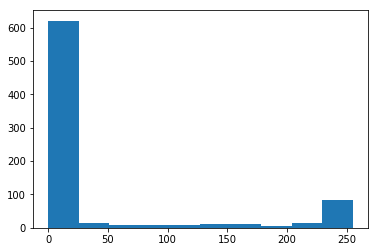

In [12]:
# examine the number of different pixels in the training data
plt.hist(train_images.iloc[num_images])

In [6]:
# load in test data for submission
# make prediction 
test_data = pd.read_csv('image_test.csv')
results = image_classifier.predict(test_data)

# add Label and ImageId columns for submission csv file
test_data['Label'] = pd.Series(results)
test_data['ImageId'] = test_data.index + 1
submission = test_data[['ImageId', 'Label']]

submission.to_csv('Digit_Recognizer.csv', index=False)